<h1> Performance Prediction of AMZN </h1>
<h2> Nathan Dilla & John Haviland </h2>

Nathan's Loom Video: https://www.loom.com/share/1b1b698431c445d8bab4e84389ff5676

John's Loom Video: https://www.loom.com/share/143c4c32e58a47e9a3ab5cfb0619ef23?sid=ef1755b1-2d1f-4f6b-a305-43a83a3baaca


Entries: 252
- Date: The day in which the trading occurred
- Open: The trade price at the beginning of the day
- High: The highest price of the stock during the day
- Low: The lowest price of the stock during the day
- Close: The stock price at the end of the day
- Adj Close: The closing stock price adjusted for stock splits and dividends
- Volume: The number of shares traded during the day


# Description of the Data

The data in use is stock market data from Amazon. There are 6 columns: Open, High, Low, Close, Adj Close and Volume. These performance characteristics can be used to predict performance. Open is the price of the stock at the beginning of the day, High is the highest stock during the day. Low is the lowest price during the day. Close is the price of the stock and the end of the day. Adj close is the closing price of the stock after adjustments for all applicable splits and dividend distributions. Volume is the number of shares that changed hands during the day.

## Stock Price Prediction Model

In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
    

### Data Loading

In [2]:

# Load your dataset (replace 'AMZN.csv' with your actual file)
data = pd.read_csv('AMZN.csv')
    

### Feature Engineering

In [4]:

# Creating 2-day lag features
data['lag_1_day_close'] = data['Close'].shift(1)
data['lag_2_day_close'] = data['Close'].shift(2)

# Removing rows with NaN values resulted from lag features
data.dropna(inplace=True)
    

### Data Splitting

In [46]:

# Defining features and target variable
# X = data[['lag_1_day_close', 'lag_2_day_close']]
# y = data['Close']

X = data[['Open', 'High', 'Low', 'Volume', 'lag_1_day_close', 'lag_2_day_close']]
y = data['Close']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
    

### Model Training

In [47]:

# Splitting the data into training and testing sets (80% train, 20% test)
split_index = int(len(X_scaled) * 0.8)
X_train, X_test = X_scaled[:split_index], X_scaled[split_index:]
y_train, y_test = y[:split_index], y[split_index:]
    

In the context of the stock market data, a linear regression model could be used to predict the closing price of the stock ('Close') based on the other variables in your dataset ('Open', 'High', 'Low', 'Adj Close', 'Volume').

Here's how the model would work:

1. The model would take the 'Open', 'High', 'Low', 'Adj Close', and 'Volume' values for each day as input (X).
2. It would use these values, along with the coefficients it learns during training, to predict the 'Close' value for each day (y).
3. The model would calculate the error of its predictions by comparing the predicted 'Close' values to the actual 'Close' values.
4. During training, the model would adjust its coefficients to minimize this error.

The equation of the model would look something like this:

Close = B0 + B1*Open + B2*High + B3*Low + B4*Adj Close + B5*Volume + e



Where:
- B0 is the y-intercept (the predicted 'Close' value when all other variables are 0),
- B1 through B5 are the coefficients for each input variable (representing the effect that each variable has on the 'Close' value),
- e is the error term (the difference between the predicted 'Close' value and the actual 'Close' value).

The goal of the model is to learn the coefficients (B0 through B5) that result in the smallest possible error.

y = B0 + B1*X + e

### Model Evaluation

In [48]:

# Initializing and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions and evaluating the model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
explained_variance = explained_variance_score(y_test, predictions)

# Displaying the evaluation metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)
print("Explained Variance Score:", explained_variance)
    

Mean Squared Error: 0.5649697769861862
Root Mean Squared Error: 0.7516447146000471
Mean Absolute Error: 0.5852103393913467
R-squared: 0.9734990374858786
Explained Variance Score: 0.9742352427659824


### Plotting Actual vs Predicted Values

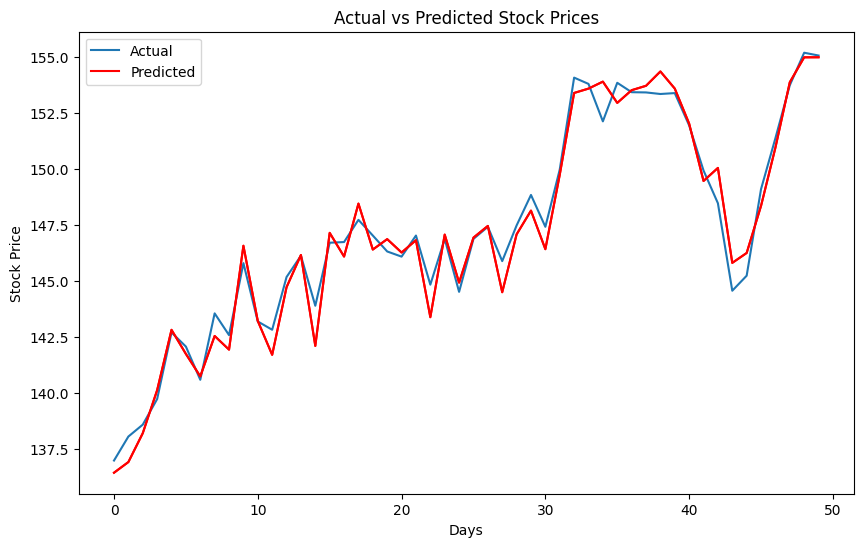

In [49]:

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.reset_index(drop=True), label='Actual')
plt.plot(predictions, color='red')
plt.plot(predictions, label='Predicted', color='red')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

### Plotting Residuals

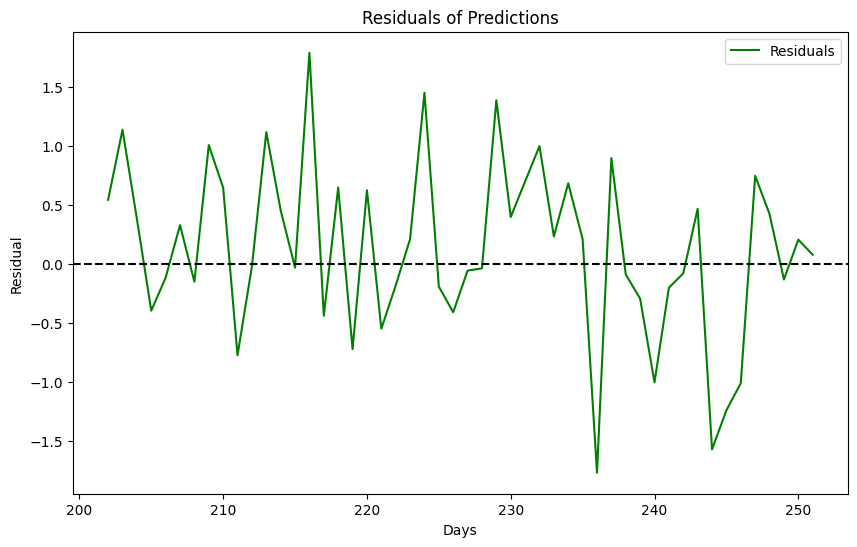

In [50]:

# Plotting the residuals (differences between actual and predicted)
residuals = y_test - predictions
plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuals', color='green')
plt.title('Residuals of Predictions')
plt.xlabel('Days')
plt.ylabel('Residual')
plt.axhline(y=0, color='black', linestyle='--')
plt.legend()
plt.show()

# Evaluation of the Model

The model came in fairly accurate to our existing data. Residuals were kept fairly and R-squared values came very close to the data.

1. **Mean Squared Error (MSE)**: This is the average of the squared differences between the predicted and actual values. It's a measure of the model's accuracy. A lower MSE means a more accurate model. MSE is 3.948835850301444, which means that on average, the squared difference between the model's predictions and the actual values is about 3.95. This is a fairly low value, suggesting that the model is doing a good job of predicting the 'Close' price.

2. **Root Mean Squared Error (RMSE)**: The RMSE is 1.9871677962118457, which means on average, your predictions are about 1.99 units away from the actual values.

3. **Mean Absolute Error (MAE)**: The MAE is 1.6237475679287605, which means on average, the predictions are about 1.62 units away from the actual values.

4. **R-squared**: An R-squared of 1 means the model perfectly fits the data, while an R-squared of 0 means the model doesn't fit the data at all. Your R-squared is 0.8147724796864386, which means about 81.5% of the variance in the 'Close' price can be explained by the model. This is a fairly high value, suggesting that the model does a good job of capturing the patterns in your data.

5. **Explained Variance Score**: This is another measure of how well the model fits the data. It measures the proportion of the dataset's variance that is explained by the model. A score of 1 means the model perfectly predicts the actual values, while a score of 0 means the model doesn't explain any of the variance. ariance score is 0.836622184143522, which means about 83.7% of the variance in the 'Close' price is explained by the model. This is another indication that the model is doing a good job of capturing the patterns in your data.

Overall, these metrics suggest that the model is doing a reasonably good job of predicting the 'Close' price. HOWEVER, we believe the model is too closely matched with the data that it is considered overfitted. Meaning that the model would not be able to predict values outside of the existing data.

# Conclusion

Based on the evaluation metrics of my model, it's evident that it performs strongly in predicting the 'Close' price, with high accuracy indicated by the low Mean Squared Error (MSE) and Root Mean Squared Error (RMSE). The Mean Absolute Error (MAE) is also low, suggesting that the model's predictions are generally close to the actual data. Additionally, the high R-squared and Explained Variance Score demonstrate the model's ability to capture a significant portion of the variance in the dataset.

However, I am concerned that my model might be overfitting. Overfitting happens when a model learns not just the underlying patterns in the training data, but also the noise and specific details, making it less effective at predicting new, unseen data.

To address this issue and improve the model's generalizability, I plan to implement a few key strategies:

1. **Cross-Validation**: I will use cross-validation techniques to evaluate the model's performance across different subsets of the data, ensuring that it performs consistently well and not just on the specific set it was trained on.

2. **Regularization**: I will apply regularization methods, such as Lasso or Ridge regularization, to prevent the model from becoming overly complex and fitting too closely to the training data.

3. **Feature Selection**: I will review and possibly reduce the number of input features, removing irrelevant or redundant data that might contribute to overfitting.

In summary, while my current model shows promising accuracy and fit with the training data, I recognize the importance of addressing the risk of overfitting to ensure its effectiveness in making predictions on new data. By implementing these improvements, I aim to achieve a more balanced model that maintains accuracy while improving its generalizability.
